# Project 1

    We begin by loading the data

In [1]:

from preprocessing_functions import *
%matplotlib inline 
import numpy as np   # generic stuff
import matplotlib.pyplot as plt

#### REMOVE THIS LINE BEFORE SUBMISSION
import pandas as pd
#######################################################################

from lib.proj1_helpers import * #the helper provided for the project
from lib.costs import *

# choose which implementations you would like
from lib.implementations import *
#from implementations import * #our implementations of the functions done by us


import datetime
from helpers import * #helpers of exo 2
# Useful starting lines

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import operator

In [3]:
DATA_FOLDER = '../data/' # get rid of the ..

y_train, tx_train, ids_train = load_csv_data(DATA_FOLDER+'train.csv',sub_sample=False)

y_test, tx_test, ids_test = load_csv_data(DATA_FOLDER+'test.csv',sub_sample=False)
AAA = 0;

note that here we are only considering a sub_sample as the "True" value indicates

In [4]:
print(tx_train.shape)
print(tx_test.shape)
print(y_train.shape)

(250000, 30)
(568238, 30)
(250000,)


In [5]:
# illegal: 
pd.DataFrame(tx_train).head()

0        1        2       3       4        5        6      7       8   \
0  138.470   51.655   97.827  27.980    0.91  124.711    2.666  3.064  41.928   
1  160.937   68.768  103.235  48.146 -999.00 -999.000 -999.000  3.473   2.078   
2 -999.000  162.172  125.953  35.635 -999.00 -999.000 -999.000  3.148   9.336   
3  143.905   81.417   80.943   0.414 -999.00 -999.000 -999.000  3.310   0.414   
4  175.864   16.915  134.805  16.405 -999.00 -999.000 -999.000  3.891  16.405   

        9    ...        20       21   22       23       24       25       26  \
0  197.760   ...    -0.277  258.733  2.0   67.435    2.150    0.444   46.062   
1  125.157   ...    -1.916  164.546  1.0   46.226    0.725    1.158 -999.000   
2  197.814   ...    -2.186  260.414  1.0   44.251    2.053   -2.028 -999.000   
3   75.968   ...     0.060   86.062  0.0 -999.000 -999.000 -999.000 -999.000   
4   57.983   ...    -0.871   53.131  0.0 -999.000 -999.000 -999.000 -999.000   

       27       28       29  
0    1.24   -2.475  113.497  
1 -999.00 -999.000   46.226  
2 -999.00 -999.000   44.251  
3 -999.00 -999.000    0.000  
4 -999.00 -999.000    0.000  

[5 rows x 30 columns]

# Methods

### Functions for methods: 

In [6]:
OUT_FOLDER = 'output/'

def func_least_squares (y, tx, test_set, fct='mse'):
    #name = 'least_squares'
    w,loss = least_squares(y,tx,fct)
    #y_pred = predict_labels(w, test_set)
    #create_csv_submission(ids_test, y_pred, OUT_FOLDER+name)
    
    plt.plot(w, 'go')
    plt.title('least squares weights for loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

def func_GD (y, tx, test_set, max_iters, gamma, initial_w):
    name = 'Gradient_descent'
    w,loss = least_squares_GD(y, tx, initial_w, max_iters, gamma,fct='mse');
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, OUT_FOLDER+name)
    
    plt.plot(w, 'go')
    plt.title('GD: weights with loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

########################  RIDGE REGRESSION #######################################################
def func_ridge_regression (y, tx, test_set, lambda_):
    name = 'Ridge_regression'
    
    w,loss = ridge_regression(y, tx, lambda_=lambda_, fct='mse');
    
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, OUT_FOLDER+name)
    
    plt.plot(w, 'go')
    plt.title('Ridge regression: weights ;loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

## LEAST-SQUARES

In [7]:
#todo: cross_validation su degree

In [22]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

def cross_validation_least_square(y, tx, k_fold, degs):            
    seed=1;

    # get k'th subgroup in test, others in train
    k_indices = build_k_indices(y, k_fold, seed)
    accuracy_train = np.zeros([k_fold, len(degs)])
    accuracy_test = np.zeros([k_fold, len(degs)])
               
    for k in range(k_fold):
        print('----- FOLD', k, '-----')
        k_index = k_indices[k]
        test_y = y[k_index]
        test_tx = tx[k_index,:]
        mask = np.ones(len(y), dtype=bool) # set all elements to True
        mask[k_index] = False              # set test elements to False
        train_tx = tx[mask,:]              # select only True elements (ie train elements)
        train_y = y[mask]

        len_init_data = 0

        for i, single_deg in enumerate(degs):
            
            print('++++ Deg =', single_deg)
            if i==0:
                train_tx, test_tx, len_init_data = prepare_data(train_tx, test_tx, single_deg);
            else:
                train_tx = add_powers(train_tx, single_deg, 0, len_init_data, features='x', current_max_deg=single_deg-1)
                test_tx = add_powers(test_tx, single_deg, 0, len_init_data, features='x', current_max_deg=single_deg-1)
            weights,loss = least_squares(train_y,train_tx,fct='mse');

            # Compute the predictions
            y_pred_train = predict_labels(weights, train_tx)
            y_pred_test = predict_labels(weights, test_tx);
            accuracy_train[k, i] = np.sum(y_pred_train == train_y)/len(train_y)
            accuracy_test[k, i] = np.sum(y_pred_test == test_y)/len(test_y)

    accuracies_test=np.mean(accuracy_test, axis=0); # mean on the k's
    accuracies_train=np.mean(accuracy_train, axis=0);

    max_index, acc_max = max(enumerate(accuracies_test), key=operator.itemgetter(1))
    deg_best = degs[max_index]
    
    return deg_best, acc_max;

**** Starting Jet  0 *****
----- FOLD 0 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 1 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 2 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 3 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 4 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
12
12
[ 0.63061756  0.61141027  0.57356621  0.54820338  0.54161746  0.50752677

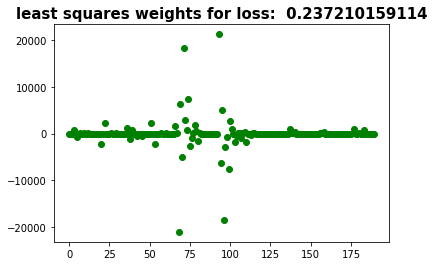

**** Jet  0 ***** Accuracy jet 83.4135698057
**** Starting Jet  1 *****
----- FOLD 0 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 1 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 2 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 3 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 4 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
12
12
[ 0.54350013  0.54740779  0

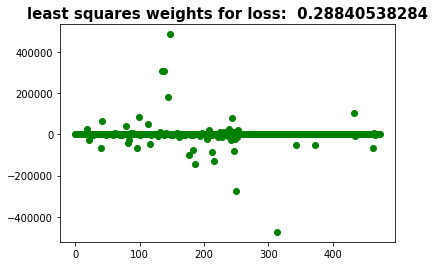

**** Jet  1 ***** Accuracy jet 80.7992881461
**** Starting Jet  2 *****
----- FOLD 0 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 1 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 2 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 3 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 4 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
12
12
[ 0.52015881  0.51406452  0

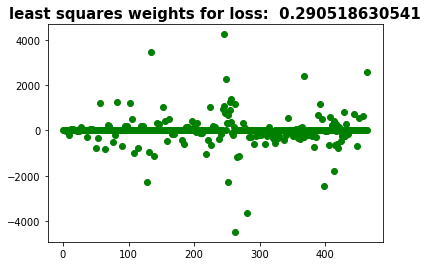

**** Jet  2 ***** Accuracy jet 80.5831794994
**** Starting Jet  3 *****
----- FOLD 0 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 1 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 2 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 3 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
----- FOLD 4 -----
++++ Deg = 2
++++ Deg = 3
++++ Deg = 4
++++ Deg = 5
++++ Deg = 6
++++ Deg = 7
++++ Deg = 8
++++ Deg = 9
++++ Deg = 10
++++ Deg = 11
++++ Deg = 12
++++ Deg = 13
12
12
[ 0.51326715  0.50672383  0

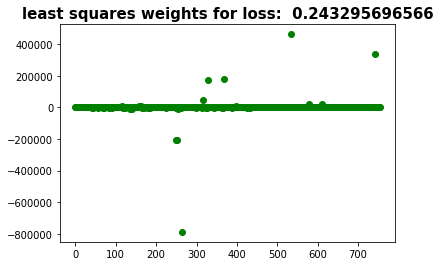

**** Jet  3 ***** Accuracy jet 84.8853997473
>>>>>>>> Accuracy TOTAL  82.1628


In [23]:
OUT_FOLDER = 'output/'
name = 'least_squares.csv'

degs=range(2,14)
k_fold=5

mask_jets_train = split_jets_mask(tx_train)
mask_jets_test = split_jets_mask(tx_test)
len_mask = len(mask_jets_train)
y_preds_train = np.zeros(len(y_train))
y_preds_test = np.zeros(tx_test.shape[0])


for mask_jet_id in range(len_mask):
    print('**** Starting Jet ', mask_jet_id, '*****')
    tx_single_jet_train = tx_train[mask_jets_train[mask_jet_id]]
    tx_single_jet_test = tx_test[mask_jets_test[mask_jet_id]]
    y_single_jet_train = y_train[mask_jets_train[mask_jet_id]]
    
    best_deg, best_acc = cross_validation_least_square(y_single_jet_train, tx_single_jet_train, k_fold, degs)
    print('Best degree = ', best_deg)
    
    tx_single_jet_train, tx_single_jet_test,len_init_data = prepare_data(tx_single_jet_train,tx_single_jet_test, best_deg)
    w, loss = func_least_squares(y=y_single_jet_train, tx=tx_single_jet_train, test_set=tx_single_jet_test, fct='mse')
    
    y_pred_train = predict_labels(w, tx_single_jet_train)
    y_pred_test = predict_labels(w, tx_single_jet_test)
    y_preds_train[mask_jets_train[mask_jet_id]] = y_pred_train
    y_preds_test[mask_jets_test[mask_jet_id]] = y_pred_test
    
    right_train = np.sum(y_single_jet_train == y_pred_train)/len(y_single_jet_train)*100
    
    print('**** Jet ', mask_jet_id, '***** Accuracy jet', right_train)
    

create_csv_submission(ids_test, y_preds_test, OUT_FOLDER+name)
right_train_total = np.sum(y_train == y_preds_train)/len(y_train)*100
print('>>>>>>>> Accuracy TOTAL ',right_train_total)

In [24]:
len(y_preds_test[y_preds_test==-1])

321587

In [25]:
len(y_preds_test[y_preds_test==1])

246651

In [15]:
len(y_preds_test[y_preds_test==-1])+len(y_preds_test[y_preds_test==1])==tx_test.shape[0]

True

In [26]:
y_preds_test[:200]

array([ 1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1.,
       -1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
       -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,
        1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1., -1.,
       -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,
       -1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,
       -1.,  1., -1., -1.,  1., -1., -1., -1.,  1., -1., -1., -1., -1.,
       -1., -1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1.,  1.,  1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1., -1

## Gradient descent 

In [ ]:
#cross validation su gamma e degree 

In [ ]:


def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)





def cross_validation_GD(y,tx, k_fold, max_iters, gammas):
    
    accuracies_test=np.zeros(len(gammas))
    accuracies_train=np.zeros(len(gammas))
    acc_max=0;
    gamma_best=0;
    
    for i, single_gamma in enumerate(gammas):
        
        seed=1;

        # get k'th subgroup in test, others in train
        k_indices = build_k_indices(y, k_fold, seed)
        accuracy_train = np.zeros(k_fold)
        accuracy_test = np.zeros(k_fold)


        for k in range(k_fold):
            #print('----- FOLD', k, '-----')
            k_index = k_indices[k]
            test_y = y[k_index]
            test_tx = tx[k_index,:]
            mask = np.ones(len(y), dtype=bool) # set all elements to True
            mask[k_index] = False              # set test elements to False
            train_tx = tx[mask,:]              # select only True elements (ie train elements)
            train_y = y[mask]
            initial_w = np.zeros(train_tx.shape[1]);
            weights,loss = logistic_regression(train_y, train_tx, initial_w, max_iters, single_gamma)
            # Compute the predictions
            y_pred_train = predict_labels(weights, train_tx)
            y_pred_test = predict_labels(weights, test_tx);
            accuracy_train[k] = np.sum(y_pred_train == train_y)/len(train_y)
            accuracy_test[k] = np.sum(y_pred_test == test_y)/len(test_y)
            
        accuracies_test[i]=np.mean(accuracy_test);
        accuracies_train[i]=np.mean(accuracy_train);
        
        print('GAMMA:', single_gamma, '---','ACCURANCY TEST:',accuracies_test[i], '---','ACCURANCY TRAIN:',accuracies_train[i])
        if (accuracies_test[i]>acc_max):
                gamma_best=gammas[i];
                acc_max=accuracies_test[i];
    
    return [gamma_best,acc_max]

In [ ]:
deg=5;
mask_jets_train = split_jets_mask(tx_train)
mask_jets_test = split_jets_mask(tx_test)
len_mask = len(mask_jets_train)
for mask_jet_id in range(len_mask):
    print('**** Starting Jet ', mask_jet_id, '*****')
    tx_single_jet_train = tx_train[mask_jets_train[mask_jet_id]]
    tx_single_jet_test =  tx_test[mask_jets_test[mask_jet_id]]
    y_single_jet_train =   y_train[mask_jets_train[mask_jet_id]]
    tx_single_jet_train, tx_single_jet_test, len_init = prepare_data(tx_single_jet_train, tx_single_jet_test, deg);
    initial_w = np.zeros(tx_single_jet_train.shape[1]);
    w, loss = func_GD (y=y_single_jet_train, tx=tx_single_jet_train, test_set=tx_single_jet_test, max_iters=500,gamma=0.01, initial_w=initial_w);
    
    y_pred_train = predict_labels(w, tx_single_jet_train)
    y_pred_test = predict_labels(w, tx_single_jet_test)
    y_preds_train[mask_jets_train[mask_jet_id]] = y_pred_train
    y_preds_test[mask_jets_test[mask_jet_id]] = y_pred_test
    
    right_train = np.sum(y_single_jet_train == y_pred_train)/len(y_single_jet_train )*100
    
    print('**** Jet ', mask_jet_id, '*****accuracy jet',right_train)
    

    
right_train_total = np.sum(y_train == y_preds_train)/len(y_train )*100
print('>>>>>>>> Accuracy TOTAL ',right_train_total)

## Ridge regression   

In [ ]:
deg=5;
lambda_=1e-5
mask_jets_train = split_jets_mask(tx_train)
mask_jets_test = split_jets_mask(tx_test)
len_mask = len(mask_jets_train)
for mask_jet_id in range(len_mask):
    print('**** Starting Jet ', mask_jet_id, '*****')
    tx_single_jet_train = tx_train[mask_jets_train[mask_jet_id]]
    tx_single_jet_test =  tx_test[mask_jets_test[mask_jet_id]]
    y_single_jet_train =   y_train[mask_jets_train[mask_jet_id]]
    tx_single_jet_train, tx_single_jet_test, len_init = prepare_data(tx_single_jet_train, tx_single_jet_test, deg);
    
    [w,loss]=func_ridge_regression (y=y_single_jet_train, tx=tx_single_jet_train, test_set=tx_single_jet_test, lambda_=lambda_);    
    
    y_pred_train = predict_labels(w, tx_single_jet_train)
    y_pred_test = predict_labels(w, tx_single_jet_test)
    y_preds_train[mask_jets_train[mask_jet_id]] = y_pred_train
    y_preds_test[mask_jets_test[mask_jet_id]] = y_pred_test
    
    right_train = np.sum(y_single_jet_train == y_pred_train)/len(y_single_jet_train )*100
    
    print('**** Jet ', mask_jet_id, '*****accuracy jet',right_train)
    

    
right_train_total = np.sum(y_train == y_preds_train)/len(y_train )*100
print('>>>>>>>> Accuracy TOTAL ',right_train_total)

##  SGD

In [ ]:
def func_SGD (y, tx, test_set, max_iters, gamma, initial_w, batch_size):
    name = 'Stochastic_Gradient_descent'
    
    w,loss = least_squares_SGD(y, tx, initial_w, max_iters,\
                               gamma, batch_size)
    
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, OUT_FOLDER+name)
    
    plt.plot(w, 'go')
    plt.title('SGD: weights with loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

In [ ]:
deg=5;
lambda_=1e-5
mask_jets_train = split_jets_mask(tx_train)
mask_jets_test = split_jets_mask(tx_test)
len_mask = len(mask_jets_train)
for mask_jet_id in range(len_mask):
    print('**** Starting Jet ', mask_jet_id, '*****')
    tx_single_jet_train = tx_train[mask_jets_train[mask_jet_id]]
    tx_single_jet_test =  tx_test[mask_jets_test[mask_jet_id]]
    y_single_jet_train =   y_train[mask_jets_train[mask_jet_id]]
    tx_single_jet_train, tx_single_jet_test, len_init = prepare_data(tx_single_jet_train, tx_single_jet_test, deg);
    
    initial_w = np.zeros(tx_single_jet_train.shape[1]);
    w, loss = func_SGD (y=y_single_jet_train, tx=tx_single_jet_train, test_set=tx_single_jet_test, max_iters=500,gamma=0.00005, initial_w=initial_w,\
                   batch_size=1);    
   
    y_pred_train = predict_labels(w, tx_single_jet_train)
    y_pred_test = predict_labels(w, tx_single_jet_test)
    y_preds_train[mask_jets_train[mask_jet_id]] = y_pred_train
    y_preds_test[mask_jets_test[mask_jet_id]] = y_pred_test
    
    right_train = np.sum(y_single_jet_train == y_pred_train)/len(y_single_jet_train )*100
    
    print('**** Jet ', mask_jet_id, '*****accuracy jet',right_train)
    

    
right_train_total = np.sum(y_train == y_preds_train)/len(y_train )*100
print('>>>>>>>> Accuracy TOTAL ',right_train_total)






## LOGISTIC REGRESSION

In [ ]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

def cross_validation_logistic_regression(y,tx, k_fold, max_iters, gammas):
    
    accuracies_test=np.zeros(len(gammas))
    accuracies_train=np.zeros(len(gammas))
    acc_max=0;
    gamma_best=0;
    
    for i, single_gamma in enumerate(gammas):
        
        seed=1;

        # get k'th subgroup in test, others in train
        k_indices = build_k_indices(y, k_fold, seed)
        accuracy_train = np.zeros(k_fold)
        accuracy_test = np.zeros(k_fold)


        for k in range(k_fold):
            #print('----- FOLD', k, '-----')
            k_index = k_indices[k]
            test_y = y[k_index]
            test_tx = tx[k_index,:]
            mask = np.ones(len(y), dtype=bool) # set all elements to True
            mask[k_index] = False              # set test elements to False
            train_tx = tx[mask,:]              # select only True elements (ie train elements)
            train_y = y[mask]
            initial_w = np.zeros(train_tx.shape[1]);
            weights,loss = logistic_regression(train_y, train_tx, initial_w, max_iters, single_gamma)
            # Compute the predictions
            y_pred_train = predict_labels(weights, train_tx)
            y_pred_test = predict_labels(weights, test_tx);
            accuracy_train[k] = np.sum(y_pred_train == train_y)/len(train_y)
            accuracy_test[k] = np.sum(y_pred_test == test_y)/len(test_y)
            
        accuracies_test[i]=np.mean(accuracy_test);
        accuracies_train[i]=np.mean(accuracy_train);
        
        print('GAMMA:', single_gamma, '---','ACCURANCY TEST:',accuracies_test[i], '---','ACCURANCY TRAIN:',accuracies_train[i])
        if (accuracies_test[i]>acc_max):
                gamma_best=gammas[i];
                acc_max=accuracies_test[i];
    
    return [gamma_best,acc_max]
               
        # Compute accuracy of the predictions

        

In [ ]:
def func_logistic (y, tx, test_set, max_iters, gamma, initial_w):
    name = 'Logistic regression'
    
    #w,loss = logistic_regression(y, tx, initial_w, max_iters, gamma)
    w,loss = logistic_regression(y, tx, initial_w, max_iters, gamma)
    
    loss=loss/len(y);
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, OUT_FOLDER+name)  
    
    plt.plot(w, 'go')
    plt.title('logistic reg: weights with loss:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

In [ ]:
gammas=np.linspace(0.00001,0.9,10);
k_fold=3;
max_iters=1000;
deg=5;


mask_jets_train = split_jets_mask(tx_train)
mask_jets_test = split_jets_mask(tx_test)
len_mask = len(mask_jets_train)
for mask_jet_id in range(len_mask):
    print('**** Starting Jet ', mask_jet_id, '*****')
    tx_single_jet_train = tx_train[mask_jets_train[mask_jet_id]]
    tx_single_jet_test =  tx_test[mask_jets_test[mask_jet_id]]
    y_single_jet_train =   y_train[mask_jets_train[mask_jet_id]]
    tx_single_jet_train, tx_single_jet_test, len_init = prepare_data(tx_single_jet_train, tx_single_jet_test, deg);
    
    
    
    [best_gamma,acc_max]=cross_validation_logistic_regression(y_single_jet_train, tx_single_jet_train, k_fold, max_iters, gammas)
    
    print('BEST GAMMA:', best_gamma, '---','ACCURANCY:',acc_max)

    initial_w = np.zeros(tx_single_jet_train.shape[1]);
    w, loss = func_logistic (y=y_single_jet_train, tx=tx_single_jet_train, test_set=tx_single_jet_test, max_iters=1000,\
                         gamma=best_gamma, initial_w=initial_w);
    
    y_pred_train = predict_labels(w, tx_single_jet_train)
    y_pred_test = predict_labels(w, tx_single_jet_test)
    y_preds_train[mask_jets_train[mask_jet_id]] = y_pred_train
    y_preds_test[mask_jets_test[mask_jet_id]] = y_pred_test
    
    right_train = np.sum(y_single_jet_train == y_pred_train)/len(y_single_jet_train )*100
    
    print('**** Jet ', mask_jet_id, '*****accuracy jet',right_train)
    

    
right_train_total = np.sum(y_train == y_preds_train)/len(y_train )*100
print('>>>>>>>> Accuracy TOTAL ',right_train_total)


    
    
    


## LOGISTIC REGULARIZED

In [ ]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

def cross_validation_logistic_regression_reg(y,tx, k_fold, max_iters, gammas,lambdas):
    
    acc_max=0;
    accuracies_test=np.zeros([len(gammas),len(lambdas)]);
    
    accuracies_train=np.zeros([len(gammas),len(lambdas)]);
    
    
    for i, single_gamma in enumerate(gammas):
        for j, single_lambda in enumerate(lambdas):
            seed=1;
        
            # get k'th subgroup in test, others in train
            k_indices = build_k_indices(y, k_fold, seed)
            accuracy_train = np.zeros(k_fold)
            accuracy_test = np.zeros(k_fold)


            for k in range(k_fold):
                #print('----- FOLD', k, '-----')
                k_index = k_indices[k]
                test_y = y[k_index]
                test_tx = tx[k_index,:]

                mask = np.ones(len(y), dtype=bool) # set all elements to True
                mask[k_index] = False              # set test elements to False
                train_tx = tx[mask,:]              # select only True elements (ie train elements)
                train_y = y[mask]
                initial_w = np.zeros(train_tx.shape[1]);
                weights,loss = reg_logistic_regression(train_y, train_tx,single_lambda, initial_w, max_iters, single_gamma)
                # Compute the predictions
                y_pred_train = predict_labels(weights, train_tx)
                y_pred_test = predict_labels(weights, test_tx)
                predictions=True;
                accuracy_train[k] = np.sum(y_pred_train == train_y)/len(train_y)
                accuracy_test[k] = np.sum(y_pred_test == test_y)/len(test_y)
                
                
            accuracies_test[i,j]= np.mean(accuracy_test);
            accuracies_train[i,j]= np.mean(accuracy_train);
            print('GAMMA', single_gamma, '---','LAMBDA', single_lambda, '---ACCURANCY TEST:',accuracies_test[i,j],'---ACCURANCY TRAIN:',accuracies_train[i,j])
            
            if (accuracies_test[i,j]>acc_max):
                gamma_best=gammas[i];
                lambda_best=lambdas[j];
                acc_max=accuracies_test[i,j];
            
            
    return [gamma_best,lambda_best,acc_max]
     
    
    
            # Compute accuracy of the predictions

            

In [ ]:
def func_logistic_reg (y, tx, lambda_, test_set, max_iters, gamma, initial_w):
    name = 'Logistic regression regularized'
    
    #w,loss = logistic_regression(y, tx, initial_w, max_iters, gamma)
    w,loss = reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma)
    
    loss=loss/len(y);
    y_pred = predict_labels(w, test_set)
    create_csv_submission(ids_test, y_pred, OUT_FOLDER+name)
    
    plt.plot(w, 'go')
    plt.title('logistic reg: weights with the normalized log-like:  '+str(loss),fontsize=15, fontweight='bold');
    plt.show()
    
    return w, loss

In [ ]:
#test cross_validation

gammas=np.linspace(0.000001,0.0001,2);
lambdas=np.linspace(0.001,0.3,2);
k_fold=6;
max_iters=50;

deg=2;

mask_jets_train = split_jets_mask(tx_train)
mask_jets_test = split_jets_mask(tx_test)
len_mask = len(mask_jets_train)
for mask_jet_id in range(len_mask):
    print('**** Starting Jet ', mask_jet_id, '*****')
    tx_single_jet_train = tx_train[mask_jets_train[mask_jet_id]]
    tx_single_jet_test =  tx_test[mask_jets_test[mask_jet_id]]
    y_single_jet_train =   y_train[mask_jets_train[mask_jet_id]]
    tx_single_jet_train, tx_single_jet_test, len_init
    = prepare_data(tx_single_jet_train, tx_single_jet_test, deg);
    
    [gamma_best,lambda_best,acc_max]= cross_validation_logistic_regression_reg(y_single_jet_train, tx_single_jet_train, k_fold, max_iters, gammas,lambdas)
    print('BEST GAMMA', gamma_best, '---','BEST LAMBDA', lambda_best, '---ACCURANCY:',acc_max)
    
    initial_w = np.zeros(tx_single_jet_train.shape[1]);
    w, loss = func_logistic_reg (y=y_single_jet_train, tx=tx_single_jet_train, lambda_=lambda_best, test_set=tx_single_jet_test , max_iters=max_iters,\
                         gamma=gamma_best, initial_w=initial_w);


    
    y_pred_train = predict_labels(w, tx_single_jet_train)
    y_pred_test = predict_labels(w, tx_single_jet_test)
    y_preds_train[mask_jets_train[mask_jet_id]] = y_pred_train
    y_preds_test[mask_jets_test[mask_jet_id]] = y_pred_test
    
    right_train = np.sum(y_single_jet_train == y_pred_train)/len(y_single_jet_train )*100
    
    print('**** Jet ', mask_jet_id, '*****accuracy jet',right_train)
    

    
right_train_total = np.sum(y_train == y_preds_train)/len(y_train )*100
print('>>>>>>>> Accuracy TOTAL ',right_train_total)


    
    
